In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
     Country or Area  Year        Value  Value Footnotes
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [45]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")
print(gdp_df.head())
print(gdp_df.tail())
print(gdp_df.info())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
     Country or Area  Year        Value  Value Footnotes
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float6

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [46]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1) #axis-1: column, #axis=0: row
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'}) #original : updated
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [71]:
obs_per_country = gdp_df.groupby('Country').size()
counted_all_years = obs_per_country[obs_per_country == gdp_df['Year'].nunique()] #==: equal to
missing_years = obs_per_country[obs_per_country < gdp_df['Year'].nunique()]
obs_per_year = gdp_df['Year'].value_counts()
print(f"Counted every year: {len(counted_all_years)}") #fstring to add context to answer. 
print(f"Not counted every year: {len(missing_years)}")
print(obs_per_year)

Counted every year: 202
Not counted every year: 40
Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

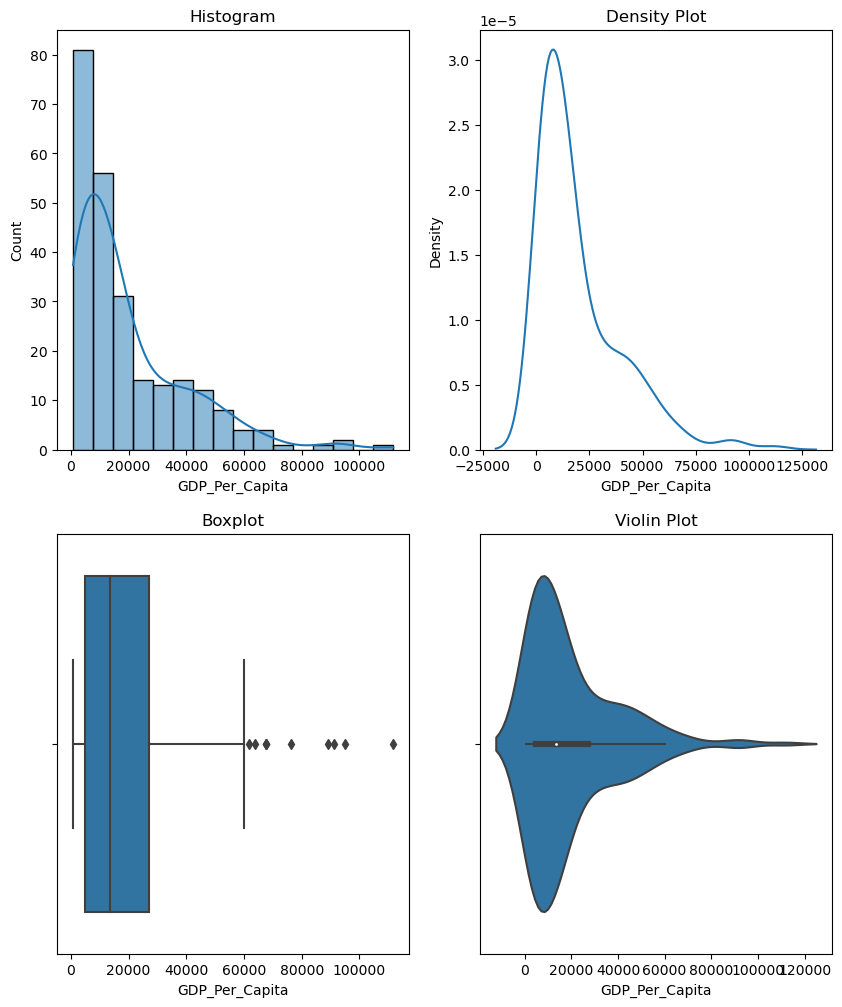

In [76]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

# Histogram
sns.histplot(data=gdp_2020, x='GDP_Per_Capita', kde=True, ax=axes[0, 0]) #ax=axes [0,0] where it apprears in the subplot (1)
axes[0, 0].set_title('Histogram')

# Density Plot
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita', ax=axes[0, 1]) #2
axes[0, 1].set_title('Density Plot')

# Boxplot
sns.boxplot(data=gdp_2020, x='GDP_Per_Capita', ax=axes[1, 0]) #3
axes[1, 0].set_title('Boxplot')

# Violin Plot
sns.violinplot(data=gdp_2020, x='GDP_Per_Capita', ax=axes[1, 1]) #4
axes[1, 1].set_title('Violin Plot')

plt.show()

9. What was the median GDP per capita value in 2020?

In [77]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
print(median_gdp_2020)

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


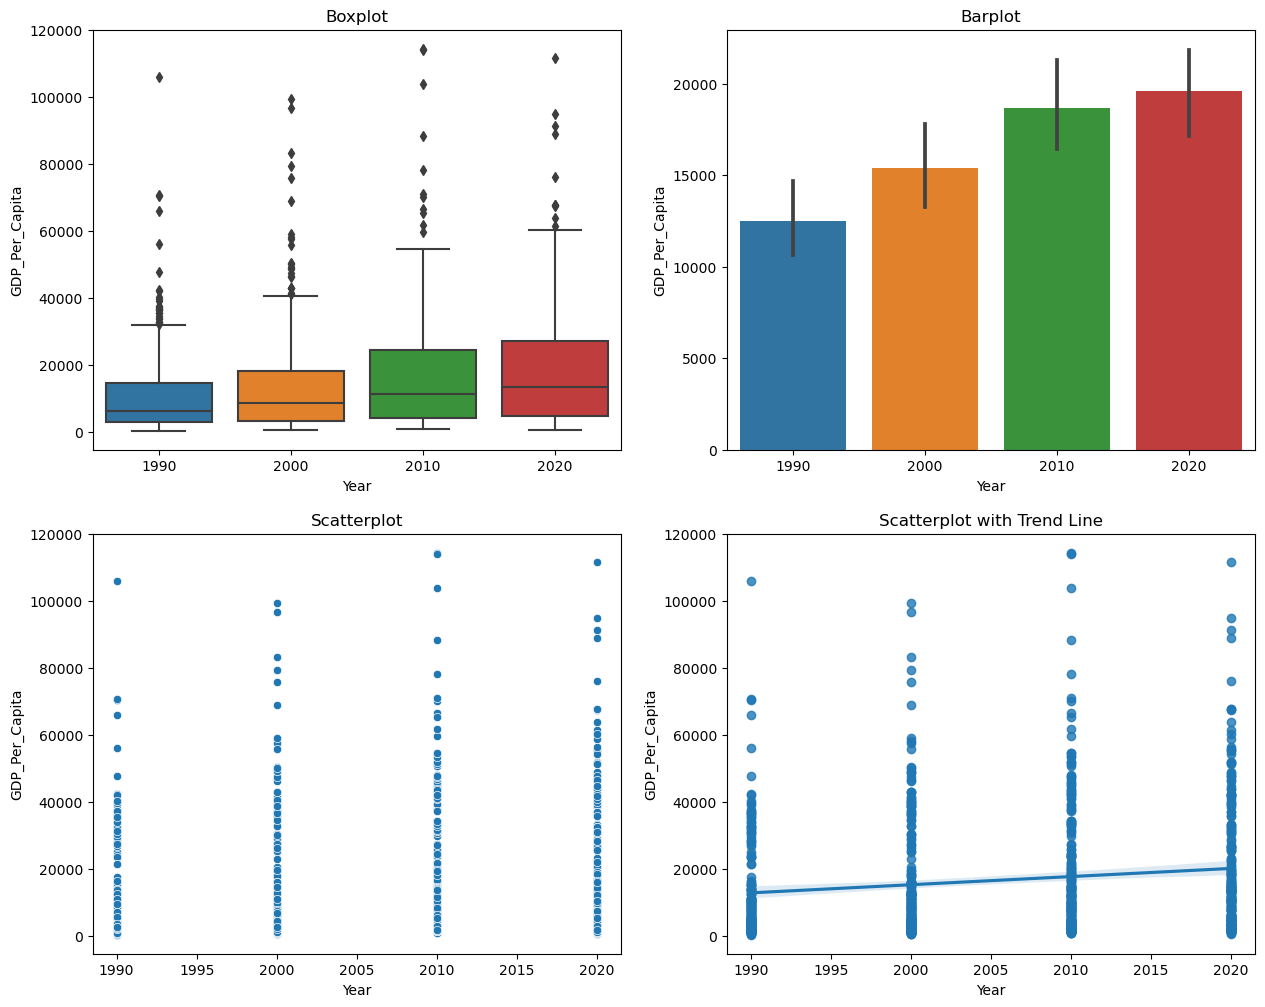

In [79]:
decades = [1990, 2000, 2010, 2020]
gdp_decade = gdp_df[gdp_df['Year'].isin(decades)]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=gdp_decade, x='Year', y='GDP_Per_Capita', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot')

# Barplot
sns.barplot(data=gdp_decade, x='Year', y='GDP_Per_Capita', ax=axes[0, 1])
axes[0, 1].set_title('Barplot')

# Scatterplot
sns.scatterplot(data=gdp_decade, x='Year', y='GDP_Per_Capita', ax=axes[1, 0])
axes[1, 0].set_title('Scatterplot')

# Plotting Scatterplot (Trend Line)
sns.regplot(data=gdp_decade, x='Year', y='GDP_Per_Capita', ax=axes[1, 1])
axes[1, 1].set_title('Scatterplot with Trend Line')

plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [86]:
first_above_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(by='Year').iloc[0]
first_country_100k = first_above_100k['Country']
first_100k = first_above_100k['Year']
print(first_country_100k)
print(first_100k)

United Arab Emirates
1990


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Luxembourg


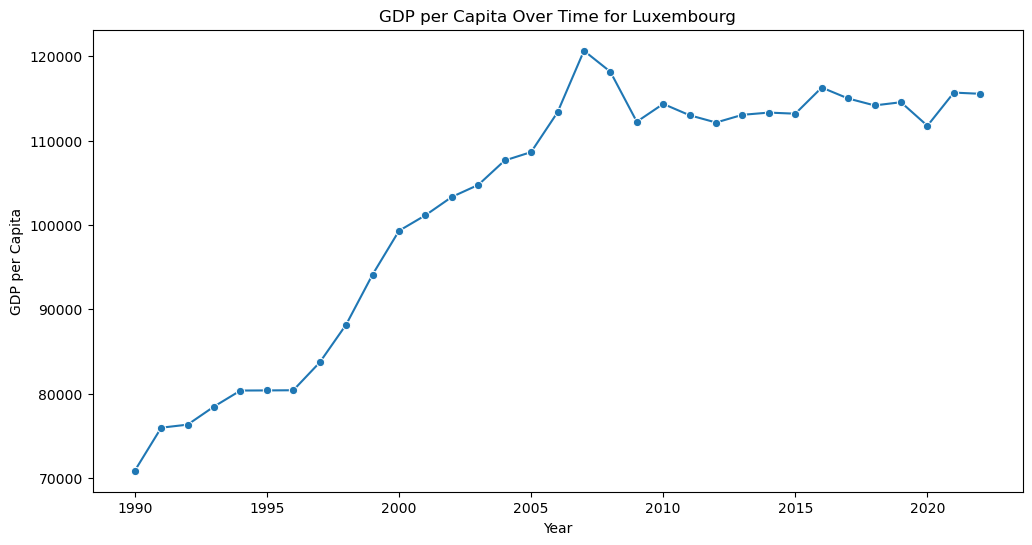

In [91]:
highest_gdp_2020 = gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'GDP_Per_Capita') #.nlargest(1 selects first row?
highest_gdp = highest_gdp_2020['Country'].values[0]
print(highest_gdp_country)

country_data = gdp_df[gdp_df['Country'] == highest_gdp]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_data, marker='o')
plt.title(f'GDP per Capita Over Time for {highest_gdp}')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Burundi


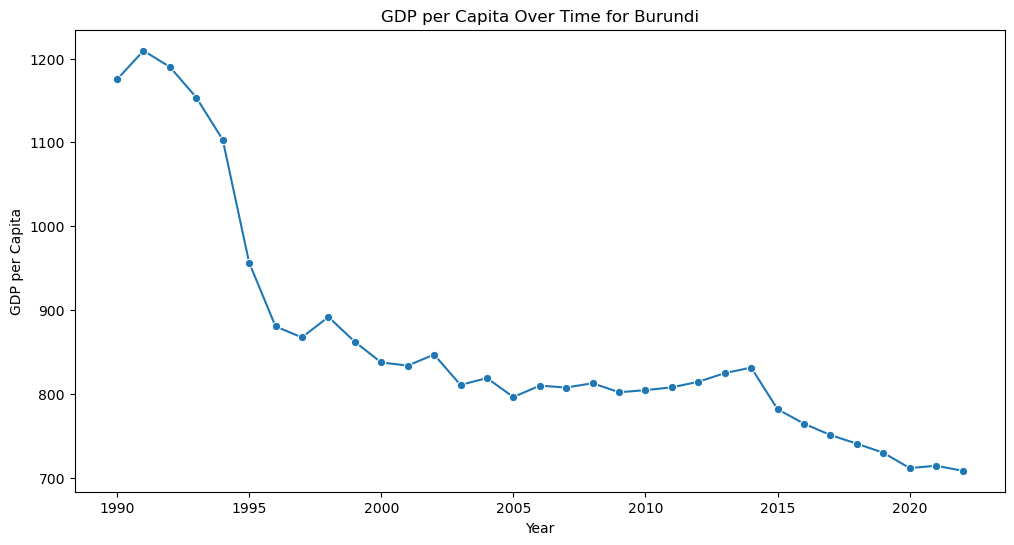

In [90]:
lowest_gdp_2020 = gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita') #.smallest(1, selects first row?
lowest_gdp_country = lowest_gdp_2020['Country'].values[0]
print(lowest_gdp_country)
lowest_country = gdp_df[gdp_df['Country'] == lowest_gdp_country]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=lowest_country, marker='o')
plt.title(f'GDP per Capita Over Time for {lowest_gdp_country}')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [56]:
internet_df = pd.read_csv(
    "../data/internet_use.csv",
    encoding='latin1', #common choice, but what exactly is happening here? 
    skiprows=range(4675, 9999999),
    on_bad_lines='skip'
)
print(internet_df.head())
print(internet_df.tail())
print(internet_df.dtypes)

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area                                               Year  \
4667             172  Population age 16+ using the Internet in the l...   
4668             173  Population age 16+ using internet in the last ...   
4669             174  U.S. Census Bureau, Table 2. Reported Internet...   
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   

      Value  Value Footnotes  
4667    NaN              NaN  
4668    NaN              NaN  
4669    NaN              NaN  
4670    NaN              NaN  
4671    NaN              NaN  
Country or Area     object
Year                object
Val

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [57]:
internet_df = internet_df.drop('Value Footnotes', axis=1) #axis = 1 indicates column.
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'}) #original : updated
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [58]:
obs_per_year_internet = internet_df['Year'].value_counts() #years seems off, but not sure why 
print(obs_per_year_internet)

Year
1990                                                     210
2011                                                     207
2007                                                     206
2008                                                     204
2012                                                     203
                                                        ... 
Population age 5+ (Source: INEC, households survey)        1
Estimated based on survey results.                         1
Population age 10+.                                        1
In the last 12 months. Individuals aged 10 and above.      1
NTIA/CPS survey.                                           1
Name: count, Length: 220, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [95]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce') #errors='coerce' for non-numeric values, converts all to NaN. Is this correct?
non_zero_internet_df = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_non_zero_year = non_zero_obs_per_year_internet = internet_df['Year'].value_counts()
first_non_zero_year = non_zero_internet_df['Year'].min()
print(first_non_zero_year)

1990.0


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [61]:
internet_2000 = internet_df[internet_df['Year'] == 2000]['Internet_Users_Pct']
internet_2014 = internet_df[internet_df['Year'] == 2014]['Internet_Users_Pct']
print("2000:")
print(internet_2000.describe())
print("2014:")
print(internet_2014.describe())

2000:
count    199.000000
mean       8.886166
std       13.309767
min        0.000000
25%        0.401189
50%        2.506411
75%        9.733934
max       52.000000
Name: Internet_Users_Pct, dtype: float64
2014:
count    202.000000
mean      45.249851
std       29.573613
min        0.000000
25%       17.517500
50%       44.655000
75%       69.945000
max       98.160000
Name: Internet_Users_Pct, dtype: float64


19. For how many countries was the percentage of internet users below 5% in 2014?

In [96]:
below_5_per_2014 = sum(internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]['Country'].notna())
print(below_5_per_2014)

16


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [63]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country    Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2021.0     1517.016266                 NaN
1  Afghanistan  2020.0     1968.341002                 NaN
2  Afghanistan  2019.0     2079.921861                 NaN
3  Afghanistan  2018.0     2060.698973                 NaN
4  Afghanistan  2017.0     2096.093111                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8908     172   NaN             NaN                 NaN
8909     173   NaN             NaN                 NaN
8910     174   NaN             NaN                 NaN
8911     175   NaN             NaN                 NaN
8912     176   NaN             NaN                 NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [69]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.copy()
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=[0, 1/3, 2/3, 1], labels=['Low', 'Medium', 'High'])
print(gdp_and_internet_use_2014[['Country', 'GDP_Per_Capita', 'GDP_group']].head())

                         Country  GDP_Per_Capita GDP_group
7                    Afghanistan     2144.449634       Low
28   Africa Eastern and Southern     3642.875373       Low
61    Africa Western and Central     4146.994622       Low
94                       Albania    11586.817446    Medium
127                      Algeria    11561.259795    Medium


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?